In [1]:
mean = 50 
median = 56 
mode = 60 
sd = 8.5 
p1stc =  (mean - mode ) / sd 
p1stc

-1.1764705882352942

# Calculating Descriptive Statistics
Mulailah dengan mengimpor semua packages yang kita perlukan:

In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

Ini semua adalah paket yang kita perlukan untuk penghitungan statistik Python. Biasanya, kita tidak akan menggunakan built-in math package Python, tapi akan berguna dalam sesi ini. Nanti, kita juga akan mengimpor matplotlib.pyplot untuk visualisasi data.

Mari buat beberapa data untuk dikerjakan. Kita akan mulai dengan List Python yang berisi beberapa data numerik:

In [3]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


Sekarang kita memiliki lists x dan x_with_nan. Keduanya hampir sama, dengan perbedaan bahwa x_with_nan berisi nilai nan. Penting untuk memahami behavior statistik Python ketika mereka menemukan nilai not-a-number (nan). Dalam data science, missing values adalah hal biasa, dan kita akan sering menggantinya dengan nan.

Sekarang, buat objek np.ndarray dan pd.Series yang sesuai dengan x dan x_with_nan:

In [4]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
print(y)

[ 8.   1.   2.5  4.  28. ]


In [5]:
print(y_with_nan)

[ 8.   1.   2.5  nan  4.  28. ]


In [6]:

z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(z)
print(z_with_nan)

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [7]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]


In [8]:
mean_ = sum(x) / len(x)
mean_

8.7

Meskipun kode diatas clean dan elegan, Anda juga dapat menerapkan fungsi statistics built-in Python:



In [9]:
mean_ = statistics.mean(x)
print(mean_)


8.7


In [10]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


Hasil ini konsisten dengan behavior sum(), karena sum(x_with_nan) juga mengembalikan nan.

Jika kita menggunakan NumPy, maka kita bisa mendapatkan mean dengan np.mean():

In [11]:
mean_ = np.mean(y)
mean_

8.7


Dalam contoh di atas, mean() adalah sebuah fungsi, tetapi kita juga dapat menggunakan method .mean ():

In [12]:
mean_ = y.mean()
mean_

8.7

Fungsi mean() dan method .mean() dari NumPy mengembalikan hasil yang sama seperti statistics.mean(). Dibawah ini adalah kasus ketika ada nilai nan di antara data kita:

In [13]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


Jika kalian lebih suka mengabaikan nilai nan, kalian dapat menggunakan np.nanmean ():



In [14]:
np.nanmean(y_with_nan)


8.7

nanmean() mengabaikan semua nilai nan. nanmean() mengembalikan nilai yang sama seperti mean() jika kalian menerapkannya ke kumpulan data tanpa nilai nan.

pd.Series objects juga mempunyai method .mean():

In [15]:
mean_ = z.mean()
mean_

8.7

Seperti yang kalian lihat, .mean() digunakan dengan cara yang sama seperti dalam kasus NumPy. Namun, .mean() dari Pandas mengabaikan nilai nan secara default:



In [16]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

In [17]:
z_with_nan.mean()


8.7

Perilaku ini adalah hasil dari nilai default dari parameter opsional skipna. Kita dapat mengubah parameter ini untuk mengubah perilakunya.

# Weighted Mean
Weighted mean, juga disebut weighted arithmetic mean atau weighted average, adalah generalisasi dari rata-rata aritmatika yang memungkinkan kita untuk menentukan kontribusi relatif dari setiap titik data ke hasil.

Kita menentukan satu bobot ùë§·µ¢ untuk setiap titik data ùë•·µ¢ dari dataset ùë•, di mana ùëñ = 1, 2,‚Ä¶, ùëõ dan ùëõ adalah jumlah item di ùë•. Kemudian, kita mengalikan setiap titik data dengan bobot yang sesuai, menjumlahkan semua produk, dan membagi jumlah yang diperoleh dengan jumlah bobot: Œ£·µ¢(ùë§·µ¢ùë•·µ¢) / Œ£·µ¢ùë§·µ¢.

Weighted mean sangat berguna saat kita membutuhkan rata-rata kumpulan data yang berisi item yang muncul dengan frekuensi relatif tertentu. Misalnya, kiita memiliki himpunan di mana 20% dari semua item sama dengan 2, 50% item sama dengan 4, dan 30% sisanya sama dengan 8. Kita dapat menghitung rata-rata dari set seperti ini:

In [18]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8


4.8

Di sini, kita memperhitungkan frekuensi dengan bobot. Dengan metode ini, kita tidak perlu mengetahui jumlah item.

Kita dapat mengimplementasikan weighted mean dalam Python pure dengan menggabungkan sum() dengan range() atau zip():

In [19]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)



6.95


In [20]:
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95


Sekali lagi, ini adalah implementasi yang rapi dan elegan di mana kita tidak perlu mengimpor libraries apa pun.

Namun, jika kita memiliki kumpulan data yang besar, NumPy kemungkinan akan memberikan solusi yang lebih baik. Kita dapat menggunakan np.average() untuk mendapatkan weighted mean dari array NumPy atau Series Pandas:

In [21]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


Hasilnya sama dengan kasus implementasi Python pure. Kita juga dapat menggunakan metode ini pada list dan tuples.

Solusi lain adalah dengan menggunakan element-wise produc w * y dengan np.sum() atau .sum():

In [22]:
(w * y).sum() / w.sum()


6.95

In [23]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [25]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [26]:
scipy.stats.hmean(y)


2.7613412228796843

In [27]:
scipy.stats.hmean(z)


2.7613412228796843

In [28]:
x = [8.0, 1, 2.5, 4, 28.0]

In [29]:
scipy.stats.gmean(y)


4.67788567485604

In [30]:
scipy.stats.gmean(z)


4.67788567485604

# Median




In [31]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

Versi yang diurutkan dari x adalah [1, 2.5, 4, 8.0, 28.0], jadi elemen di tengah adalah 4. Versi yang diurutkan dari x[:-1], yaitu x tanpa item terakhir 28.0, adalah [1, 2.5, 4, 8.0]. Sekarang, ada dua elemen tengah, 2.5 dan 4. Rata-ratanya adalah 3.25.

median_low() dan median_high() adalah dua fungsi lainnya yang terkait dengan median di pustaka statistics Python. Mereka selalu mengembalikan elemen dari kumpulan data:

Jika jumlah elemennya ganjil, maka hanya ada satu nilai tengah, sehingga fungsi ini berperilaku seperti median().
Jika jumlah elemennya genap, maka ada dua nilai tengah. Dalam kasus ini, median_low() mengembalikan nilai tengah yang lebih rendah dan median_high() lebih tinggi.
Kita dapat menggunakan fungsi ini seperti halnya kita menggunakan median():

In [32]:
x

[8.0, 1, 2.5, 4, 28.0]

In [33]:
statistics.median_low(x[:-1])


2.5

In [34]:
statistics.median_high(x[:-1])


4

Sekali lagi, versi yang diurutkan dari x[:-1] adalah [1, 2.5, 4, 8.0]. Dua elemen di tengah adalah 2.5 (low) dan 4 (high).

Tidak seperti kebanyakan fungsi lain dari pustaka statistics  Python, median(), median_low(), dan median_high() tidak mengembalikan nan ketika ada nilai nan di antara titik data:

In [35]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


Kita juga bisa mendapatkan median dengan np.median ():



In [36]:
median_ = np.median(y)
print(median_)


4.0


In [37]:
median_ = np.median(y[:-1])
print(median_)

3.25


# Mode


In [38]:
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_
# Kita bisa mendapatkan mode dengan statistics.mode()



2

In [39]:
mode_ = statistics.mode(u)
mode_
# Kita juga bisa mendapatkan mode dengan scipy.stats.mode():



2

In [40]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_


ModeResult(mode=array([2]), count=array([2]))

In [41]:
mode_ = scipy.stats.mode(v)
mode_


ModeResult(mode=array([12]), count=array([3]))

In [42]:
# Kita bisa mendapatkan mode dan jumlah kemunculannya sebagai array NumPy dengan dot notation:



In [43]:
print(mode_.mode)
print(mode_.count)


[12]
[3]


Objek Pandas Series memiliki metode .mode() yang menangani nilai multimodal dengan baik dan mengabaikan nilai nan secara default:



In [44]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


Seperti yang kalian lihat, .mode() mengembalikan pd.Series baru yang menampung semua nilai modal. Jika kalian ingin .mode() memperhitungkan nilai nan, cukup teruskan argumen opsional dropna = False.

Measures of Variability
Measures of central tendency tidak cukup untuk menggambarkan data. Kita juga memerlukan ukuran variabilitas yang mengukur penyebaran titik data. Di bagian ini, kita akan mempelajari cara mengidentifikasi dan menghitung ukuran variabilitas berupa:

# Variance


In [45]:
var_ = statistics.variance(x)
var_

123.2

Kita juga dapat menghitung sample variance dengan NumPy. Kita harus menggunakan fungsi np.var() atau method .var():

In [46]:
var_ = np.var(y, ddof=1)
var_


123.19999999999999

In [47]:
var_ = y.var(ddof=1)
var_


123.19999999999999

In [48]:
z.var(ddof=1)


123.19999999999999

# Standar Deviation

In [50]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [51]:
# Meskipun solusi ini berhasil, kita juga dapat menggunakan statistics.stdev():
std_ = statistics.stdev(x)
std_


11.099549540409287

Tentu saja hasilnya sama seperti sebelumnya. Seperti variance(), stdev() tidak menghitung mean jika kita memberikannya secara eksplisit sebagai argumen kedua: statistics.stdev(x, mean_).

Kita bisa mendapatkan standard deviation dengan NumPy dengan cara yang hampir sama. Kita dapat menggunakan fungsi std() dan method .std() untuk menghitung standard deviation. Jika ada nilai nan dalam kumpulan data, maka akan mengembalikan nan. Untuk mengabaikan nilai nan, kita harus menggunakan np.nanstd().

In [52]:
np.std(y, ddof=1)


11.099549540409285

In [53]:
y.std(ddof=1)


11.099549540409285

In [54]:
# Objek pd.Series juga memiliki method .std() yang mengabaikan nan secara default:

z.std(ddof=1)


11.099549540409285

Parameter ddof default adalah 1, jadi kita bisa menghilangkannya. Sekali lagi, jika kita ingin memperlakukan nilai nan secara berbeda, maka terapkan parameter skipna.

Population standard deviation mengacu pada keseluruhan populasi. Ini adalah akar kuadrat positif dari population variance. Kita dapat menghitungnya seperti sample standard deviation, dengan perbedaan sebagai berikut:

Find the square root of the population variance in the pure Python implementation.
Use statistics.pstdev() instead of statistics.stdev().
Specify the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0. As you can see, you can determine the standard deviation in Python, NumPy, and Pandas in almost the same way as you determine the variance. You use different but analogous functions and methods with the same arguments.

## Skewness
Sample skewness mengukur asimetri sampel data.



In [55]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
skew_


1.9470432273905929

Skewness menunjukan angka positive, jadi x mempunyai right-side tail.

Kita juga dapat menghitung sample skewness dengan scipy.stats.skew():



In [56]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [57]:
scipy.stats.skew(y_with_nan, bias=False)


nan

Hasil yang diperoleh sama dengan implementasi Python pure. Parameter bias diset ke False untuk mengaktifkan koreksi bias statistik. Parameter opsional nan_policy dapat menerima nilai 'propagate', 'raise', atau 'omit'. Ini memungkinkan kita untuk mengontrol cara kita menangani nilai nan.

Objek Pandas Series memiliki metode .skew() yang juga mengembalikan skewness kumpulan data:

In [58]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [59]:
z_with_nan.skew()


1.9470432273905924

# Percentiles


Percentiles
sample ùëù percentile adalah elemen dalam kumpulan data sehingga ùëù% elemen dalam kumpulan data kurang dari atau sama dengan nilai tersebut. Juga, (100 - ùëù)% elemen lebih besar dari atau sama dengan nilai tersebut. 

Jika ada dua elemen seperti itu dalam kumpulan data, maka persentil ùëù sampel adalah arithmetic mean mereka. 

Tiap dataset memiliki tiga quartiles, yang merupakan persentil yang membagi dataset menjadi empat bagian:

First quartile adalah sampel persentil ke-25. Kuartil pertama membagi sekitar 25% item terkecil dari kumpulan data lainnya.
Second quartile adalah sampel persentil ke-50 atau median. Kira-kira 25% item terletak di antara kuartil pertama dan kedua dan 25% lainnya antara kuartil kedua dan ketiga.
Third quartile adalah sampel persentil ke-75. Kuartil ketiga membagi sekitar 25% item terbesar dari sisa kumpulan data.
Setiap bagian memiliki jumlah item yang kurang lebih sama. Jika kita ingin membagi data kita menjadi beberapa interval, maka kita dapat menggunakan statistics.quantiles():

In [ ]:
import statistics
import numpy as np 

In [ ]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
#statistics.quantiles(x, n=2)
np.quantile(x, .50)

8.0

In [ ]:
# statistics.quantiles(x, n=4, method='inclusive')

Dalam contoh ini, 8.0 adalah median dari x, sedangkan 0.1 dan 21.0 adalah sampel persentil ke-25 dan ke-75. Parameter n menentukan jumlah persentil probabilitas sama yang dihasilkan, dan method menentukan cara menghitungnya.

Note: statistics.quantiles() is introduced in Python 3.8.

Kita juga dapat menggunakan np.percentile() untuk menentukan persentil sampel apa pun dalam kumpulan data kita. Misalnya, ini cara kita mencari persentil ke-5 dan ke-95:

In [ ]:
y = np.array(x)
np.percentile(y, 5)


-3.44

In [ ]:
np.percentile(y, 95)


34.919999999999995



percentile() membutuhkan beberapa argumen. Kita harus menyediakan dataset sebagai argumen pertama dan nilai persentil sebagai yang kedua. Dataset dapat berupa array NumPy, list, tuple, atau struktur data serupa. Persentil bisa berupa angka antara 0 dan 100 seperti pada contoh di atas, tetapi bisa juga berupa urutan angka:

In [ ]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [ ]:
np.median(y)

8.0

Kode tersebut menghitung persentil ke-25, ke-50, dan ke-75 sekaligus. Jika nilai persentil adalah sebuah urutan, maka percentile() mengembalikan array NumPy dengan hasilnya. Statement pertama mengembalikan array quartiles. Pernyataan kedua mengembalikan median, sehingga kita dapat mengonfirmasi bahwa itu sama dengan persentil ke-50, yaitu 8.0.

Jika kita ingin mengabaikan nilai nan, gunakan np.nanpercentile() sebagai gantinya:

In [ ]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [ ]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

Begitulah cara kita menghindari nilai nan.

NumPy juga menawarkan fungsionalitas yang sangat mirip di quantile() dan nanquantile(). Jika kita ingin menggunakannya, kita harus memberikan nilai-nilai kuantitatif sebagai angka antara 0 dan 1, bukan persentil:

In [ ]:
np.quantile(y, 0.05)

-3.44

In [ ]:
np.quantile(y, 0.95)

34.919999999999995

In [ ]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [ ]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

Hasilnya sama seperti pada contoh sebelumnya, tetapi di sini argumen kita antara 0 dan 1. Dengan kata lain, kita memberikan 0.05 daripada 5 dan 0.95 daripada 95.

pd.Series objek memiliki method .quantile():

In [ ]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)

In [ ]:
z.quantile(0.05)

-3.44

In [ ]:
z.quantile(0.95)

34.919999999999995

In [ ]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [ ]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

.quantile() juga membutuhkan kita untuk memberikan nilai quantile sebagai argumennya. Nilai ini bisa berupa angka antara 0 dan 1 atau urutan angka. Dalam kasus pertama, .quantile() mengembalikan skalar. Dalam kasus kedua, ia mengembalikan Series baru.

## Ranges
Rentang data/range data adalah perbedaan antara elemen maksimum dan minimum dalam kumpulan data. Kita bisa mendapatkannya dengan fungsi np.ptp():

percentile() membutuhkan beberapa argumen. Kita harus menyediakan dataset sebagai argumen pertama dan nilai persentil sebagai yang kedua. Dataset dapat berupa array NumPy, list, tuple, atau struktur data serupa. Persentil bisa berupa angka antara 0 dan 100 seperti pada contoh di atas, tetapi bisa juga berupa urutan angka:



In [ ]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [ ]:
np.median(y)

8.0

Kode tersebut menghitung persentil ke-25, ke-50, dan ke-75 sekaligus. Jika nilai persentil adalah sebuah urutan, maka percentile() mengembalikan array NumPy dengan hasilnya. Statement pertama mengembalikan array quartiles. Pernyataan kedua mengembalikan median, sehingga kita dapat mengonfirmasi bahwa itu sama dengan persentil ke-50, yaitu 8.0.

Jika kita ingin mengabaikan nilai nan, gunakan np.nanpercentile() sebagai gantinya:

In [ ]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [ ]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

Begitulah cara kita menghindari nilai nan.

NumPy juga menawarkan fungsionalitas yang sangat mirip di quantile() dan nanquantile(). Jika kita ingin menggunakannya, kita harus memberikan nilai-nilai kuantitatif sebagai angka antara 0 dan 1, bukan persentil:

In [ ]:
np.quantile(y, 0.05)

-3.44

In [ ]:
np.quantile(y, 0.95)

34.919999999999995

In [ ]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [ ]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])


Hasilnya sama seperti pada contoh sebelumnya, tetapi di sini argumen kita antara 0 dan 1. Dengan kata lain, kita memberikan 0.05 daripada 5 dan 0.95 daripada 95.

pd.Series objek memiliki method .quantile():


In [ ]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)

In [ ]:
z.quantile(0.05)

-3.44

In [ ]:
z.quantile(0.95)

34.919999999999995

In [ ]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [ ]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

.quantile() juga membutuhkan kita untuk memberikan nilai quantile sebagai argumennya. Nilai ini bisa berupa angka antara 0 dan 1 atau urutan angka. Dalam kasus pertama, .quantile() mengembalikan skalar. Dalam kasus kedua, ia mengembalikan Series baru.

Ranges
Rentang data/range data adalah perbedaan antara elemen maksimum dan minimum dalam kumpulan data. Kita bisa mendapatkannya dengan fungsi np.ptp():


In [ ]:
np.ptp(y)

46.0

In [ ]:
np.ptp(z)

46.0

In [ ]:
np.ptp(y_with_nan)

nan

In [ ]:
np.ptp(z_with_nan)

nan

Fungsi ini mengembalikan nan jika ada nilai nan dalam array NumPy kita. Jika kitamenggunakan objek Pandas Series, maka itu akan mengembalikan angka.

Sebagai alternatif, kita dapat menggunakan fungsi dan method Python, NumPy, atau Pandas bawaan untuk menghitung maksimum dan minimum:

max() and min() from the Python standard library
amax() and amin() from NumPy
nanmax() and nanmin() from NumPy to ignore nan values
.max() and .min() from NumPy
.max() and .min() from Pandas to ignore nan values by default
Berikut beberapa contoh bagaimana kita akan menggunakannya:

In [ ]:
print(y)

[-5.  -1.1  0.1  2.   8.  12.8 21.  25.8 41. ]


In [ ]:
np.amax(y) - np.amin(y)

46.0

In [ ]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [ ]:
y.max() - y.min()

46.0

In [ ]:
z.max() - z.min()

46.0

In [ ]:
z_with_nan.max() - z_with_nan.min()

46.0

Interquartile range adalah perbedaan antara kuartil pertama dan ketiga. Setelah kita menghitung kuartil, kita dapat mengambil selisihnya:

In [ ]:
quartiles = np.quantile(y, [0.25, 0.75])

In [ ]:
quartiles[1] - quartiles[0]

20.9

In [ ]:
quartiles = z.quantile([0.25, 0.75])

In [ ]:
quartiles[0.75] - quartiles[0.25]

20.9

Summary of Descriptive Statistics
SciPy dan Pandas menawarkan function yang berguna untuk mendapatkan descriptive statistics dengan cepat dengan satu panggilan fungsi atau method. Kita dapat menggunakan scipy.stats.describe() seperti ini:

In [ ]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

Kita harus memberikan dataset sebagai argumen pertama. Argumennya bisa berupa array NumPy, list, tuple, atau struktur data serupa. Kita dapat menghilangkan ddof=1 karena adalah default dan hanya penting saat kita menghitung varians. Kita bisa meneruskan bias=False untuk memaksa mengoreksi skewnessdan kurtosis untuk statistical bias.

describe() mengembalikan objek yang berupa descriptive statistics berikut:

nobs: the number of observations or elements in your dataset
minmax: the tuple with the minimum and maximum values of your dataset
mean: the mean of your dataset
variance: the variance of your dataset
skewness: the skewness of your dataset
kurtosis: the kurtosis of your dataset
Kita dapat mengakses nilai tertentu dengan dot notation:

In [ ]:
 result.nobs

9

In [ ]:
result.minmax[0]

-5.0

In [ ]:
result.minmax[1]

41.0

In [ ]:
result.mean

11.622222222222222

In [ ]:
result.variance

228.75194444444446

In [ ]:
result.skewness

In [ ]:
result.kurtosis

0.14770623629658886

Dengan SciPy, kita hanya perlu satu panggilan fungsi dari ringkasan descriptive statistics untuk kumpulan data kita.

Pandas memiliki fungsi yang serupa. Objek series memiliki metode .describe():

In [ ]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

Mengembalikan Series baru yang menampung nilai berikut:

count: the number of elements in your dataset
mean: the mean of your dataset
std: the standard deviation of your dataset
min and max: the minimum and maximum values of your dataset
25%, 50%, and 75%: the quartiles of your dataset
Jika kita ingin objek Series yang dihasilkan berisi persentil lain, kita harus menentukan nilai percentiles parameter opsional. Kita dapat mengakses setiap item result dengan labelnya:

In [ ]:
result['mean']
result['std']
result['min']
result['max']
result['25%']
result['50%']
result['75%']


21.0



>>> 


Begitulah cara kita mendapatkan statistik deskriptif dari objek Series dengan satu panggilan metode menggunakan Pandas.

Measures of Correlation Between Pairs of Data
Kita sering kali perlu memeriksa hubungan/relation antara elemen yang sesuai dari dua variabel dalam kumpulan data. Katakanlah ada dua variabel, ùë• dan ùë¶, dengan jumlah elemen yang sama, ùëõ. Misalkan ùë•‚ÇÅ dari ùë• sesuai dengan ùë¶‚ÇÅ dari ùë¶, ùë•‚ÇÇ dari ùë• ke ùë¶‚ÇÇ dari ùë¶, dan seterusnya. Kita kemudian dapat mengatakan bahwa ada ùëõ pasang elemen yang sesuai: (ùë•‚ÇÅ, ùë¶‚ÇÅ), (ùë•‚ÇÇ, ùë¶‚ÇÇ), dan seterusnya.

Kita  akan melihat measures of correlation antara pasangan data berikut:

Positive correlation exists when larger values of ùë• correspond to larger values of ùë¶ and vice versa.
Negative correlation exists when larger values of ùë• correspond to smaller values of ùë¶ and vice versa.
Weak or no correlation exists if there is no such apparent relationship.
Gambar berikut menunjukkan contoh negative, weak, dan positive correlation:

<img src="https://i.ibb.co/5BLDpz5/Screen-Shot-2021-09-23-at-5-03-58-PM.png" width="500" align="center">



Plot di sebelah kiri dengan titik merah menunjukkan korelasi negatif. Plot di tengah dengan titik-titik hijau menunjukkan korelasi yang lemah. Terakhir, plot di sebelah kanan dengan titik biru menunjukkan korelasi positif.

Dua statistik yang mengukur korelasi antar dataset adalah covariance dan correlation coefficient. Mari tentukan beberapa data untuk digunakan dengan ukuran ini. Kita akan membuat dua list Python dan menggunakannya untuk mendapatkan array NumPy dan Series Pandas yang sesuai:

In [ ]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

In [ ]:
x_, y_ = np.array(x), np.array(y)

In [ ]:
x__, y__ = pd.Series(x_), pd.Series(y_)

In [ ]:
print(x_)
print(y_)
print(x__)
print(y__)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[ 0  2  2  2  2  3  3  6  7  4  7  6  6  9  4  5  5 10 11 12 14]
0    -10
1     -9
2     -8
3     -7
4     -6
5     -5
6     -4
7     -3
8     -2
9     -1
10     0
11     1
12     2
13     3
14     4
15     5
16     6
17     7
18     8
19     9
20    10
dtype: int64
0      0
1      2
2      2
3      2
4      2
5      3
6      3
7      6
8      7
9      4
10     7
11     6
12     6
13     9
14     4
15     5
16     5
17    10
18    11
19    12
20    14
dtype: int64


Sekarang setelah kita memiliki dua variabel, kita dapat mulai menjelajahi relationship di antara keduanya.

Covariance
Sample covariance adalah ukuran yang mengukur kekuatan dan arah hubungan antara sepasang variabel:

Jika korelasinya positif, maka kovariansnya juga positif. Hubungan yang lebih kuat sesuai dengan nilai kovarians yang lebih tinggi.
Jika korelasinya negatif, maka kovariansnya juga negatif. Hubungan yang lebih kuat sesuai dengan nilai kovarians yang lebih rendah (atau lebih tinggi absolut).
Jika korelasinya lemah, maka kovariansnya mendekati nol.

Covariance variabel ùë• dan ùë¶ secara matematis didefinisikan sebagai ùë†À£ ∏ = Œ£·µ¢ (ùë•·µ¢ ‚àí mean(ùë•)) (ùë¶·µ¢ ‚àí mean(ùë¶)) / (ùëõ ‚àí 1), di mana ùëñ = 1, 2,‚Ä¶, ùëõ, mean (ùë•) adalah sample mean dari ùë•, dan mean (ùë¶) adalah sample mean dari ùë¶. Oleh karena itu, covariance dua variabel identik sebenarnya adalah varians: ùë†À£À£ = Œ£·µ¢ (ùë•·µ¢ - mean (ùë•)) ¬≤ / (ùëõ - 1) = (ùë†À£) ¬≤ dan ùë† ∏ ∏ = Œ£·µ¢ (ùë¶·µ¢ - mean (ùë¶)) ¬≤ / (ùëõ - 1) = (ùë† ∏) ¬≤.

Beginilah cara kita menghitung kovarian dengan Python pure:

In [ ]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n 
mean_x

0.0

In [ ]:
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))
           / (n - 1))
cov_xy

19.95

Pertama, kita harus mencari nilai mean dari x dan y. Kemudian, kita menerapkan rumus matematika untuk covariance.

NumPy memiliki fungsi cov() yang mengembalikan covariance matrix:

In [ ]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

Perhatikan bahwa cov() memiliki parameter opsional bias, yang defaultnya adalah False, dan ddof, yang defaultnya adalah None. Nilai defaultnya cocok untuk mendapatkan sample covariance matrix. Elemen kiri atas covariance matrix adalah covariance dari x dan x, atau variance dari x. Demikian pula, elemen kanan bawah adalah covariance y dan y, atau variance y. Kita dapat memeriksa apakah ini benar:


In [ ]:
x_.var(ddof=1)

38.5

In [ ]:
y_.var(ddof=1)

13.914285714285711

Seperti yang kita lihat, varians dari x dan y sama dengan cov_matrix[0, 0] dan cov_matrix[1, 1].

Dua elemen lain dari covariance matrix adalah sama dan mewakili covariance aktual antara x dan y:


In [ ]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [ ]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

Kita akan mendapatkan nilai kovarian yang sama dengan np.cov() seperti pada Python pure.

Series Pandas memiliki metode .cov() yang dapat digunakan untuk menghitung kovarian:

In [ ]:
cov_xy = x__.cov(y__)
cov_xy 

19.95

In [ ]:
cov_xy = y__.cov(x__)
cov_xy

19.95

Di sini, kita memanggil .cov() pada satu objek Series dan meneruskan objek lainnya sebagai argumen pertama.

Correlation Coefficient
Correlation coefficient, atau Pearson product-moment correlation coefficient, dilambangkan dengan simbol ùëü. Coefficient  adalah ukuran lain dari korelasi antar data. Kita dapat menganggapnya sebagai standardized covariance. Berikut beberapa infonya:

The value ùëü > 0 indicates positive correlation.
The value ùëü < 0 indicates negative correlation.
The value r = 1 is the maximum possible value of ùëü. It corresponds to a perfect positive linear relationship between variables.
The value r = ‚àí1 is the minimum possible value of ùëü. It corresponds to a perfect negative linear relationship between variables.
The value r ‚âà 0, or when ùëü is around zero, means that the correlation between variables is weak.
Rumus matematika untuk correlation coefficient adalah ùëü = ùë†À£ ∏ / (ùë†À£ùë† ∏) di mana ùë†À£ dan ùë† ∏ masing-masing adalah standard deviations dari ùë¶ dan ùë¶. Jika kita memiliki mean (mean_x dan mean_y) dan standard deviations (std_x, std_y) untuk dataset x dan y, serta covariannya cov_xy, maka kita dapat menghitung correlation coefficient dengan Python pure:

In [ ]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)

In [ ]:
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)

In [ ]:
 std_x, std_y = var_x ** 0.5, var_y ** 0.5

In [ ]:
r = cov_xy / (std_x * std_y)
r

0.861950005631606

Kita mendapatkan variabel r yang mewakili correlation coefficient.

scipy.stats memiliki pearsonr() yang menghitung correlation coefficient dan the ùëù-value:

In [ ]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

0.861950005631606
5.122760847201171e-07


pearsonr() mengembalikan tuple dengan dua angka. Yang pertama adalah ùëü dan yang kedua adalah ùëù-value.

Mirip dengan kasus covariance matrix, kita dapat menerapkan np.corrcoef() dengan x_ dan y_ sebagai argumen dan mendapatkan correlation coefficient matrix:

In [ ]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

Elemen kiri atas adalah correlation coefficient antara x_ dan x_. Elemen kanan bawah adalah correlation coefficient antara y_ dan y_. Nilainya sama dengan 1.0. Dua elemen lainnya sama dan mewakili koefisien korelasi aktual antara x_ dan y_:

In [ ]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [ ]:
r = corr_matrix[1, 0]
r

0.861950005631606

Tentu saja, hasilnya sama dengan Python pure dan pearsonr().

Kita bisa mendapatkan correlation coefficient dengan scipy.stats.linregress():

In [ ]:
scipy.stats.linregress(x_, y_)


LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979)


linregress() mengambil x_ dan y_, melakukan regresi linier, dan mengembalikan hasilnya. slope dan intercept menentukan persamaan regression line, sedangkan rvalue  adalah correlation coefficient. Untuk mengakses nilai tertentu dari hasil linregress(), termasuk correlation coefficient, gunakan dot notation:

In [ ]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

Series Pandas memiliki method .corr() untuk menghitung correlation coefficient:



In [ ]:
r = x__.corr(y__)
r

0.8619500056316061

In [ ]:
r = y__.corr(x__)
r

0.861950005631606

## Working With 2D Data
Statisticians sering bekerja dengan data 2D. Berikut beberapa contoh format data 2D:

* Database tables
* CSV files
* Excel, Calc, and Google spreadsheets

NumPy dan SciPy menyediakan cara yang komprehensif untuk bekerja dengan data 2D. Panda memiliki kelas DataFrame khusus untuk menangani 2D labeled data.

## Axes
Start by creating a 2D NumPy array:





In [ ]:
a = np.array([[1, 1, 1],
               [2, 3, 1],
               [4, 9, 2],
               [8, 27, 4],
               [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

Sekarang kita memiliki kumpulan data 2D, yang akan kita gunakan di section ini. Kita dapat menerapkan fungsi dan metode statistik Python ke dalamnya seperti yang kita lakukan pada data 1D:

In [ ]:
np.mean(a)
a.mean()
np.median(a)
a.var(ddof=1)

53.40000000000001

Seperti yang kita lihat, kita mendapatkan statistik (seperti mean, median, atau varians) di semua data dalam array a. Terkadang, perilaku ini yang kita inginkan, tetapi dalam beberapa kasus, kita ingin jumlah ini dihitung untuk setiap baris atau kolom dari larik 2D kita .

Fungsi dan metode yang kita gunakan sejauh ini memiliki satu parameter opsional yang disebut axis, yang penting untuk menangani data 2D. axis dapat mengambil salah satu dari nilai berikut:

axis=None says to calculate the statistics across all data in the array. The examples above work like this. This behavior is often the default in NumPy.
axis=0 says to calculate the statistics across all rows, that is, for each column of the array. This behavior is often the default for SciPy statistical functions.
axis=1 says to calculate the statistics across all columns, that is, for each row of the array.
Let‚Äôs see axis=0 in action with np.mean():

In [ ]:
np.mean(a, axis=0)
a.mean(axis=0)

array([6.2, 8.2, 1.8])


Dua pernyataan di atas mengembalikan array NumPy baru dengan mean untuk setiap kolom a. Dalam contoh ini, mean dari kolom pertama adalah 6.2. Kolom kedua memiliki mean 8.2, sedangkan kolom ketiga memiliki 1.8.

Jika kita memberikan axis=1 pada mean(), kita akan mendapatkan hasil untuk setiap baris:

In [ ]:
np.mean(a, axis=1)
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

Seperti yang kita lihat, baris pertama a memiliki mean 1.0, baris kedua 2.0, dan seterusnya.

axis parameter bekerja dengan cara yang sama dengan fungsi dan metode NumPy lainnya:

In [ ]:
np.median(a, axis=0)

array([4., 3., 1.])

In [ ]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [ ]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [ ]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

Kita mendapatkan medians dan sample variations untuk semua kolom (axis=0)) dan baris (axis=1) dari array a.

Ini sangat mirip saat kita bekerja dengan fungsi statistik SciPy. Tetapi ingat bahwa dalam kasus ini, nilai default untuk axis adalah 0:

In [ ]:
scipy.stats.gmean(a)  # Default: axis=0

array([4.        , 3.73719282, 1.51571657])

In [ ]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

Jika kita menghilangkan axis atau memberikan axis=0, kita akan mendapatkan hasil di semua baris, untuk setiap kolom. Misalnya, kolom pertama a memilikigeometric mean 4.0, dan seterusnya.

Jika kita menentukan axis=1, kita akan mendapatkan penghitungan di semua kolom, untuk setiap baris:

In [ ]:
 scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

Dalam contoh ini, geometric mean dari baris pertama a adalah 1.0. Untuk baris kedua, kira-kira 1.82, dan seterusnya.

Jika Anda menginginkan statistik untuk seluruh dataset, maka Anda harus menyediakan axis=None:

In [ ]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

Geometric mean dari semua item dalam array a adalah kira-kira 2.83.

Kita bisa mendapatkan statistics summary dengan satu panggilan fungsi untuk data 2D dengan scipy.stats.describe(). Ini berfungsi mirip dengan array 1D, tetapi kita harus berhati-hati dengan axisparameter:

In [ ]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [ ]:
scipy.stats.describe(a, ddof=1, bias=False)  # Default: axis=0

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [ ]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

Saat kita memberikan axis=None, kita mendapatkan summary di semua data. Sebagian besar hasil adalah skalar. Jika kita mengatur axis=0 atau menghilangkannya, maka nilai yang dikembalikan adalah summary untuk setiap kolom. Jadi, sebagian besar hasil adalah array dengan jumlah item yang sama dengan jumlah kolom. Jika kita menyetel axis=1, maka describe()mengembalikan summary untuk semua baris.

Kita bisa mendapatkan nilai tertentu dari ringkasan dengan dot notation:



In [ ]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

DataFrames
Kelas DataFrame adalah salah satu tipe data fundamental Pandas. DataFrame sangat nyaman digunakan karena memiliki label untuk baris dan kolom. Gunakan array a dan buat DataFrame:

In [ ]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']


In [ ]:
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

A   B  C
first    1   1  1
second   2   3  1
third    4   9  2
fourth   8  27  4
fifth   16   1  1

Dalam praktiknya, nama kolom penting dan harus deskriptif. Nama baris terkadang ditentukan secara otomatis sebagai 0, 1, dan seterusnya. Kita dapat menentukannya secara eksplisit dengan index parameter, meskipun kita bebas untuk menghilangkan indeks jika kita mau.

Metode DataFrame sangat mirip dengan metode Series, meskipun perilakunya berbeda. Jika kita memanggil metode statistics Python tanpa argumen, maka DataFrame akan mengembalikan hasil untuk setiap kolom:

In [ ]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [ ]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

Apa yang kita dapatkan adalah Series baru yang menyimpan hasil. Dalam hal ini, Series menyimpan mean dan variance untuk setiap kolom. Jika kita menginginkan hasil untuk setiap baris, maka tentukan parameter axis=1:

In [ ]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [ ]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

Hasilnya adalah Series dengan kuantitas yang diinginkan untuk setiap baris. Label 'first', 'second', dan seterusnya mengacu pada baris yang berbeda.

Kita dapat mengisolasi setiap kolom DataFrame seperti ini:

In [ ]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int64

In [ ]:
df['A'].mean()

6.2

In [ ]:
df['A'].var()

37.20000000000001

Terkadang, kita mungkin ingin menggunakan DataFrame sebagai array NumPy dan menerapkan beberapa fungsi padanya. Dimungkinkan untuk mendapatkan semua data dari DataFrame dengan .values atau .to_numpy():

In [ ]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [ ]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

df.values dan df.to_numpy() memberi kita array NumPy dengan semua item dari DataFrame tanpa label baris dan kolom. Perhatikan bahwa df.to_numpy() lebih fleksibel karena kita bisa menentukan tipe data item dan apakah kita ingin menggunakan data yang ada atau menyalinnya.

Seperti Series, objek DataFrame memiliki metode .describe() yang mengembalikan DataFrame lain dengan statistics summary untuk semua kolom:

In [ ]:
df.describe()

A          B        C
count   5.00000   5.000000  5.00000
mean    6.20000   8.200000  1.80000
std     6.09918  11.009087  1.30384
min     1.00000   1.000000  1.00000
25%     2.00000   1.000000  1.00000
50%     4.00000   3.000000  1.00000
75%     8.00000   9.000000  2.00000
max    16.00000  27.000000  4.00000

Ringkasan tersebut berisi hasil sebagai berikut:

* count: the number of items in each column
* mean: the mean of each column
* std: the standard deviation
* min and max: the minimum and maximum values
* 25%, 50%, and 75%: the percentiles

Jika kita ingin objek DataFrame yang dihasilkan berisi persentil lain, kita harus menentukan nilai parameter opsional percentiles.

Kita dapat mengakses setiap item summary seperti ini:

In [ ]:
df.describe().at['mean', 'A']

6.2

In [ ]:
df.describe().at['50%', 'B']

3.0

# Memvisualisasikan Data (Opsional)
Pengenalan Python ke Ilmu Data Siswa dapat melakukan bagian ini di bawah ini di rumah.

Selain menghitung jumlah numerik seperti mean, median, atau varians, Anda dapat menggunakan metode visual untuk menyajikan, mendeskripsikan, dan meringkas data. Di bagian ini, Anda akan mempelajari cara menyajikan data secara visual menggunakan grafik berikut:

Box plots
Histograms
Pie charts
Bar charts
X-Y plots
Heatmaps

matplotlib.pyplot adalah perpustakaan yang sangat nyaman dan banyak digunakan, meskipun itu bukan satu-satunya perpustakaan Python yang tersedia untuk tujuan ini. Anda dapat mengimpornya seperti ini:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Sekarang, Anda telah mengimpor matplotlib.pyplot dan siap digunakan. Pernyataan kedua menetapkan gaya untuk plot Anda dengan memilih warna, lebar garis, dan elemen gaya lainnya. Anda bebas untuk menghilangkan ini jika Anda puas dengan pengaturan gaya default.

Anda akan menggunakan angka pseudo-acak untuk mendapatkan data untuk digunakan. Anda tidak perlu pengetahuan tentang angka acak untuk dapat memahami bagian ini. Anda hanya perlu beberapa nomor arbitrer, dan generator pseudo-acak adalah alat yang mudah untuk mendapatkannya. Modul np.random menghasilkan array angka pseudo-acak:

Nomor yang didistribusikan secara normal dihasilkan dengan np.random.randn(). Bilangan bulat yang didistribusikan secara seragam dihasilkan dengan np.random.randint().

## Box Plots
The box plot adalah alat yang sangat baik untuk secara visual mewakili statistik deskriptif dari kumpulan data yang diberikan. Hal ini dapat menunjukkan jangkauan, jangkauan interkuartil, median, modus, outlier, dan semua kuartil. Pertama, buat beberapa data untuk direpresentasikan dengan plot kotak: 

In [ ]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

The first statement sets the seed of the NumPy random number generator with seed(),sehingga Anda bisa mendapatkan hasil yang sama setiap kali Anda menjalankan kode. Anda tidak harus sets the seed, tetapi jika Anda tidak menentukan nilai ini, maka Anda akan mendapatkan hasil yang berbeda setiap kali.

Pernyataan lain menghasilkan tiga array NumPy dengan nomor pseudo-acak terdistribusi normal. x mengacu pada larik dengan 1000 item, y memiliki 100, dan z berisi 10 item. Sekarang setelah Anda memiliki data untuk dikerjakan, Anda dapat menerapkan .boxplot() untuk mendapatkan plot kotak:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


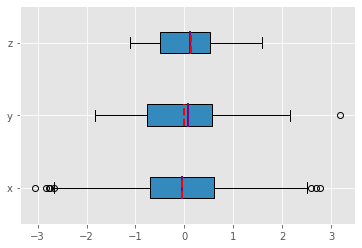

In [ ]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,           labels=('x', 'y', 'z'), patch_artist=True,           medianprops={'linewidth': 2, 'color': 'purple'},           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

The parameters of .boxplot() define the following:

x adalah data. 
vert mengatur orientasi plot ke horizontal ketika False. Orientasi default adalah vertikal. showmeans menunjukkan rata-rata data Anda ketika Benar. meanline mewakili mean sebagai garis ketika Benar. Representasi default adalah titik. labels: label data Anda. patch_artist menentukan cara menggambar grafik. medianprops menunjukkan sifat-sifat garis yang mewakili median. meanprops menunjukkan sifat-sifat garis atau titik yang mewakili mean. Kode di atas menghasilkan gambar seperti ini:

Anda dapat melihat tiga plot kotak. Masing-masing sesuai dengan satu set data (x, y, atau z) dan menunjukkan hal berikut:

Berarti adalah garis putus-putus merah. Median adalah garis ungu. Kuartil pertama adalah tepi kiri persegi panjang biru. Kuartil ketiga adalah tepi kanan persegi panjang biru. Jangkauan antarkuartil adalah panjang persegi panjang biru. Rentang berisi semuanya dari kiri ke kanan. Outlier adalah titik-titik di kiri dan kanan. Plot kotak dapat menampilkan begitu banyak informasi dalam satu gambar!

Histogram Histogram sangat berguna ketika ada sejumlah besar nilai unik dalam kumpulan data. Histogram membagi nilai dari kumpulan data yang diurutkan ke dalam interval, juga disebut bin. Seringkali, semua tempat sampah memiliki lebar yang sama, meskipun hal ini tidak harus terjadi. Nilai batas bawah dan atas bin disebut tepi bin.

Frekuensi adalah nilai tunggal yang sesuai dengan setiap bin. Ini adalah jumlah elemen dataset dengan nilai di antara tepi bin. Secara konvensi, semua tempat sampah kecuali yang paling kanan setengah terbuka. Mereka menyertakan nilai yang sama dengan batas bawah, tetapi mengecualikan nilai yang sama dengan batas atas. Bin paling kanan ditutup karena mencakup kedua batas. Jika Anda membagi dataset dengan tepi bin 0, 5, 10, dan 15, maka ada tiga bin:

Bin pertama dan paling kiri berisi nilai lebih besar atau sama dengan 0 dan kurang dari 5. Bin kedua berisi nilai lebih besar atau sama dengan 5 dan kurang dari 10. Bin ketiga dan paling kanan berisi nilai lebih besar atau sama dengan 10 dan kurang dari atau sama dengan 15. Fungsi np.histogram() adalah cara mudah untuk mendapatkan data untuk histogram:



In [ ]:
hist, bin_edges = np.histogram(x, bins=10)
hist 


array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15])

In [ ]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

Dibutuhkan array dengan data Anda dan jumlah (atau tepi) tempat sampah dan mengembalikan dua array NumPy:

hist berisi frekuensi atau jumlah item yang sesuai dengan setiap bin.
bin_edges berisi tepi atau batas bin.
Apa yang dihitung histogram(), .hist() dapat ditampilkan secara grafis:

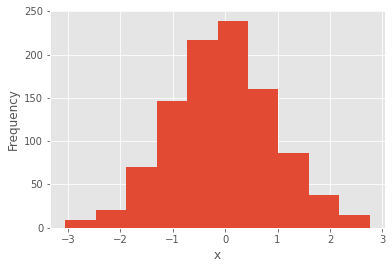

In [ ]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

Argumen pertama .hist() adalah urutan dengan data Anda. Argumen kedua mendefinisikan tepi tempat sampah. Yang ketiga menonaktifkan opsi untuk membuat histogram dengan nilai kumulatif. Kode di atas menghasilkan gambar seperti ini:

Anda dapat melihat tepi bin pada sumbu horizontal dan frekuensi pada sumbu vertikal.

Dimungkinkan untuk mendapatkan histogram dengan jumlah item kumulatif jika Anda memberikan argumen kumulatif=True ke .hist():

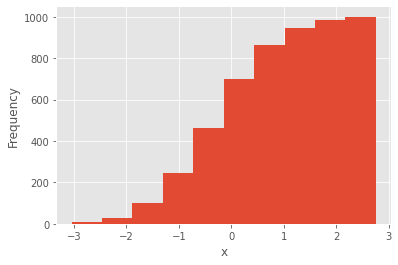

In [ ]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

Ini menunjukkan histogram dengan nilai kumulatif. Frekuensi bin pertama dan paling kiri adalah jumlah item dalam bin ini. Frekuensi bin kedua adalah jumlah dari jumlah item di bin pertama dan kedua. Tempat sampah lainnya mengikuti pola yang sama. Akhirnya, frekuensi bin terakhir dan paling kanan adalah jumlah total item dalam dataset (dalam hal ini, 1000). Anda juga dapat langsung menggambar histogram dengan pd.Series.hist() menggunakan matplotlib di latar belakang.

## Pie Charts
Diagram lingkaran mewakili data dengan sejumlah kecil label dan frekuensi relatif yang diberikan. Mereka bekerja dengan baik bahkan dengan label yang tidak dapat dipesan (seperti data nominal). Diagram lingkaran adalah lingkaran yang dibagi menjadi beberapa bagian. Setiap irisan sesuai dengan satu label berbeda dari kumpulan data dan memiliki luas yang sebanding dengan frekuensi relatif yang terkait dengan label tersebut.

Mari kita definisikan data yang terkait dengan tiga label:

In [ ]:
# Now, create a pie chart with .pie():
x, y, z = 128, 256, 1024


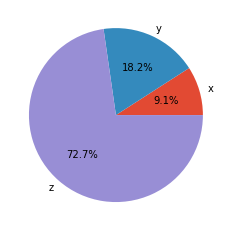

In [ ]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

The first argument of .pie() is your data, and the second is the sequence of the corresponding labels. autopct defines the format of the relative frequencies shown on the figure. You‚Äôll get a figure that looks like this:

Pie Charts menunjukkan x sebagai bagian terkecil dari lingkaran, y sebagai bagian terbesar berikutnya, dan kemudian z sebagai bagian terbesar. Persentase menunjukkan ukuran relatif dari setiap nilai dibandingkan dengan jumlah mereka.

# Bar Charts
Bagan batang juga menggambarkan data yang sesuai dengan label yang diberikan atau nilai numerik diskrit. Mereka dapat menunjukkan pasangan data dari dua kumpulan data. Item dari satu set adalah label, sedangkan item yang sesuai dari yang lain adalah frekuensinya. Secara opsional, mereka juga dapat menunjukkan kesalahan yang terkait dengan frekuensi.

Diagram batang menunjukkan persegi panjang paralel yang disebut batang. Setiap batang sesuai dengan satu label dan memiliki tinggi yang sebanding dengan frekuensi atau frekuensi relatif labelnya. Mari kita buat tiga set data, masing-masing dengan 21 item:


In [ ]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)


Anda menggunakan np.arange() untuk mendapatkan x, atau larik bilangan bulat berurutan dari 0 hingga 20. Anda akan menggunakan ini untuk mewakili label. y adalah larik bilangan bulat acak terdistribusi seragam, juga antara 0 dan 20. Larik ini akan mewakili frekuensi. err berisi angka floating-point terdistribusi normal, yang merupakan kesalahan. Nilai-nilai ini opsional.

Anda dapat membuat diagram batang dengan .bar() jika Anda menginginkan batang vertikal atau .barh() jika Anda ingin batang horizontal:

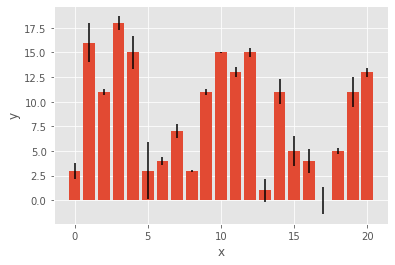

In [ ]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Ketinggian batang merah sesuai dengan frekuensi y, sedangkan panjang garis hitam menunjukkan kesalahan err. Jika Anda tidak ingin menyertakan kesalahan, hilangkan parameter yerr dari .bar().

Plot X-Y Plot xy atau plot sebar mewakili pasangan data dari dua kumpulan data. Sumbu x horizontal menunjukkan nilai dari himpunan x, sedangkan sumbu y vertikal menunjukkan nilai yang sesuai dari himpunan y. Anda dapat secara opsional memasukkan garis regresi dan koefisien korelasi. Mari buat dua kumpulan data dan lakukan regresi linier dengan scipy.stats.linregress():

In [ ]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

Regression line: y=5.49+2.02x, r=0.99


Dataset x  array dengan bilangan bulat dari 0 hingga 20. y dihitung sebagai fungsi linier dari x yang terdistorsi dengan beberapa random noise.

linregress mengembalikan beberapa nilai. Anda akan membutuhkan kemiringan dan intersep dari garis regresi, serta koefisien korelasi r. Kemudian Anda dapat menerapkan .plot() untuk mendapatkan plot xy:

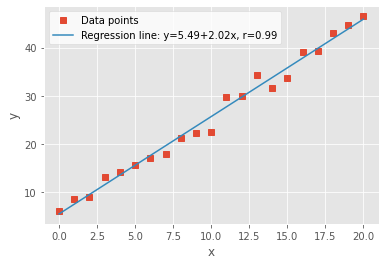

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

Anda dapat melihat titik data (pasangan xy) sebagai kotak merah, serta garis regresi biru.

Heatmaps dapat digunakan untuk menampilkan matriks secara visual. Warna mewakili angka atau elemen matriks. Peta panas sangat berguna untuk menggambarkan matriks kovarians dan korelasi. Anda dapat membuat peta panas untuk matriks kovarians dengan .imshow():

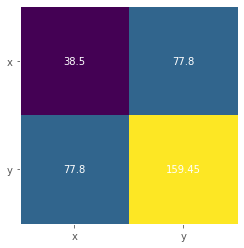

In [ ]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    
  for j in range(2):        
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

Here, the heatmap berisi label 'x' dan 'y' serta angka-angka dari matriks kovarians. Anda akan mendapatkan angka seperti ini:





Bidang kuning mewakili elemen terbesar dari matriks 130.34, sedangkan bidang ungu sesuai dengan elemen terkecil 38.5. Kotak biru di antaranya terkait dengan nilai 69,9.

Anda dapat memperoleh peta panas untuk matriks koefisien korelasi mengikuti logika yang sama:

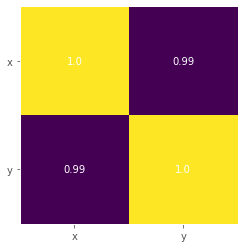

In [ ]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    
  for j in range(2):        
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

The yellow color represents the value 1.0, and the purple color shows 0.99.



In [ ]:
import random 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
random.seed(101)
data_gaji =[int(random.gauss(5000, 1000)) for num in range(1000)]
dfGaji = pd.DataFrame(data_gaji, columns = ['Gaji ($)'])

In [ ]:
dfGaji.head()

Gaji ($)
0      4425
1      4678
2      7216
3      4508
4      3555

In [ ]:
dfGaji.describe()


Gaji ($)
count  1000.000000
mean   5024.404000
std    1034.981682
min    1573.000000
25%    4338.750000
50%    5060.000000
75%    5765.250000
max    8719.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(1573, 0.2, 'Outlier')

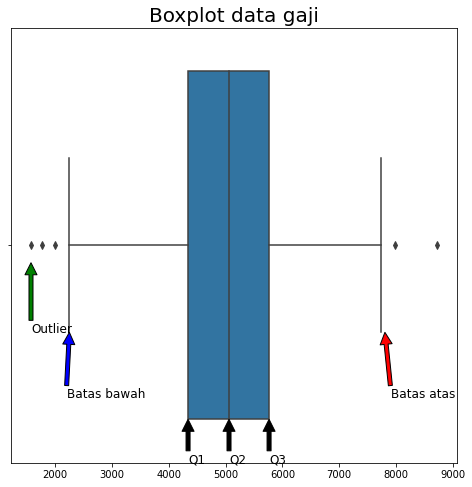

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(data_gaji)
plt.title('Boxplot data gaji', fontsize = 20)
plt.annotate('Q1', (np.percentile(data_gaji, 25), 0.4), xytext = (np.percentile(data_gaji, 25), 0.5),arrowprops = dict(facecolor = 'black'), fontsize = 12 )
plt.annotate('Q2', (np.percentile(data_gaji, 50), 0.4), xytext = (np.percentile(data_gaji, 50), 0.5),arrowprops = dict(facecolor = 'black'), fontsize = 12 )
plt.annotate('Q3', (np.percentile(data_gaji, 75), 0.4), xytext = (np.percentile(data_gaji, 75), 0.5),arrowprops = dict(facecolor = 'black'), fontsize = 12 )
IQR = np.percentile(data_gaji, 75) - np.percentile(data_gaji, 25)
batas_bawah = np.percentile(data_gaji, 25) - (1.5 * IQR)
batas_atas =  np.percentile(data_gaji, 75) + (1.5 * IQR)
plt.annotate('Batas bawah',(batas_bawah+50, 0.2), xytext = (batas_bawah, 0.35)
             ,arrowprops = dict(facecolor = 'blue'), fontsize = 12 )
plt.annotate('Batas atas', (batas_atas-100, 0.2), xytext = (batas_atas, 0.35),arrowprops = dict(facecolor = 'red'), fontsize = 12 )
plt.annotate('Outlier', (min(data_gaji), 0.04), xytext = (min(data_gaji), 0.2),arrowprops = dict(facecolor = 'green'), fontsize = 12 )

Boxplot diatas menunjukkan bagaimana data kita tersebar. Dapat terlihat bahwa antara Q1 hingga Q3 (atau 50% data) tersebar hanya dia antara $4000an hingga $6000an dengan 50% data yang lain tersebar di luar dari itu. Dengan menggunakan metode IQR juga kita mampu mendapatkan batas bawah dan atas untuk membedakan data mana yang termasuk outlier (ditandakan dengan titik hitam).

Selain itu, melalui standard deviation juga kita bisa melihat bahwa data kita tersebar sebesar $1034 dari mean. Dengan menggunakan Empirical rule sebelumnya, kita bisa memperkirakan persebaran data kita seperti gambar dibawah


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(8127.796184860947, 0.00045, '3 * STD')

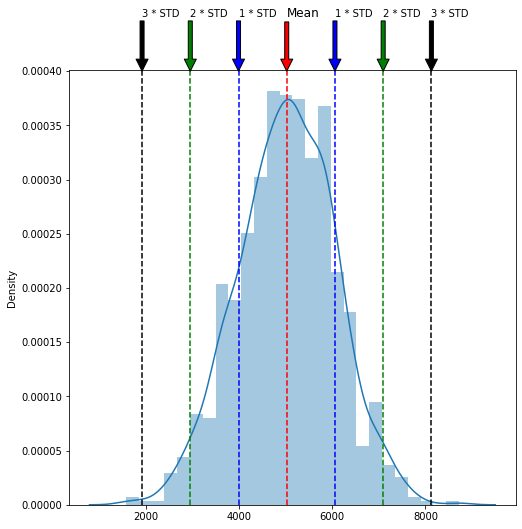

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(data_gaji)
plt.axvline(x = np.mean(data_gaji), ls = '--', c ='red')
plt.axvline(x = np.mean(data_gaji) - np.std(data_gaji), ls = '--', c = 'blue')
plt.axvline(x = np.mean(data_gaji) + np.std(data_gaji), ls = '--', c = 'blue')
plt.axvline(x = np.mean(data_gaji) - 2*np.std(data_gaji), ls = '--', c = 'green')
plt.axvline(x = np.mean(data_gaji) + 2*np.std(data_gaji), ls = '--', c = 'green')
plt.axvline(x = np.mean(data_gaji) - 3*np.std(data_gaji), ls = '--', c = 'black')
plt.axvline(x = np.mean(data_gaji) + 3*np.std(data_gaji), ls = '--', c = 'black')
plt.annotate('Mean', (np.mean(data_gaji), 0.0004), xytext = (np.mean(data_gaji), 0.00045),arrowprops = dict(facecolor = 'red'), fontsize = 12 )
plt.annotate('1 * STD', ((np.mean(data_gaji) - np.std(data_gaji)), 0.0004), xytext = ((np.mean(data_gaji) - np.std(data_gaji)), 0.00045),arrowprops = dict(facecolor = 'blue') )
plt.annotate('1 * STD', ((np.mean(data_gaji) + np.std(data_gaji)), 0.0004), xytext = ((np.mean(data_gaji) + np.std(data_gaji)), 0.00045),arrowprops = dict(facecolor = 'blue') )
plt.annotate('2 * STD', ((np.mean(data_gaji) - 2*np.std(data_gaji)), 0.0004),xytext = ((np.mean(data_gaji) - 2*np.std(data_gaji)), 0.00045),arrowprops = dict(facecolor = 'green') )
plt.annotate('2 * STD', ((np.mean(data_gaji) + 2*np.std(data_gaji)), 0.0004), xytext = ((np.mean(data_gaji) + 2*np.std(data_gaji)), 0.00045),arrowprops = dict(facecolor = 'green') )
plt.annotate('3 * STD', ((np.mean(data_gaji) - 3*np.std(data_gaji)), 0.0004),xytext = ((np.mean(data_gaji) - 3*np.std(data_gaji)), 0.00045),arrowprops = dict(facecolor = 'black') )
plt.annotate('3 * STD', ((np.mean(data_gaji) + 3*np.std(data_gaji)), 0.0004),xytext = ((np.mean(data_gaji) + 3*np.std(data_gaji)), 0.00045),arrowprops = dict(facecolor = 'black') )


1*STD adalah 68% data kita yang berada di antara mean ¬± 1 * Standard Deviation data, 2*STD adalah 95% data kita yang berada di antara mean ¬± 2* Standard Deviation, dan 3*STD adalah 99.7% data kita yang berada di antara mean ¬± 3 * Standard Deviation sehingga kita menggangap bahwa data yang sudah melebihi dari 3 * STD sudah berada di posisi 0.3% yang terlalu jauh posisinya dibandingkan mean sehingga bisa dianggap sebagai outlier.

--------


**Tipe Data**

| Data Kualitatif  |  Data Kuantitatif |
|:-----------------|:------------------|
| Data non numerik  | Data numerik dihasilkan dari |
| * Atribute  | * Perhitungan | 
|  * label  | * Pengukuran |
 


Contoh  : Menu dan Harga 



**Skala Pengukuran (Level of Measurements)**

Terdapat 4 Skala Pengukuran (Level of Measurements) dalam bidang statistika:
1. Nominal
2. Ordinal
3. Interval
4. Rasio (Ratio)


**Skala Pengukuran Nominal**
>> Berasosiasi dengan tipe data kualitatif

>> Berfokus pada pengelompokkan atau pengkategorian data berdasarkan nama, label, atau kualitas

>> Tidak dapat dikenakan operasi matematika
>>>Contoh: 
>>>>merk kendaraan bermotor

>>>>kota kelahiran

>>>>nama siswa, nama bulan, nama hari

>>>>nomor kendaraan bermotor, nomor induk siswa


**Skala Pengukuran Ordinal**

* Berasosiasi dengan tipe data kualitatif

* Data dapat dikelompokkan

* Data dapat disusun berdasarkan urutan, peringkat, atau ranking
* Tidak dapat dikenakan operasi matematika

Contoh: 
* tingkat kepuasan pelanggan: sangat puas, puas, cukup, kecewa, sangat kecewa
* temperatur udara: panas, sejuk, dingin
* peringkat siswa di kelas


**Skala Pengukuran Rasio (Ratio)**

* Berasosiasi dengan tipe data kuantitatif
* Data dapat dikelompokkan
* Data dapat disusun berdasarkan urutan, peringkat, atau ranking
* Dapat dikenakan operasi matematika untuk menghitung selisih nilai
* Memiliki nilai nol yang absolut (inherent zero)
* Dapat dikenakan operasi matematika terkait perkalian

Contoh: 
* usia anak 7 tahun
* berat badan 65 Kg
* harga nasi goreng Rp 25,000


**Skala Pengukuran Interval**

* Berasosiasi dengan tipe data kuantitatif
* Data dapat dikelompokkan
* Data dapat disusun berdasarkan urutan, peringkat, atau ranking
* Dapat dikenakan operasi matematika untuk menghitung selisih nilai
* Nilai numerik merepresentasikan posisi pada suatu skala ukur tertentu
* Tidak memiliki nilai nol yang absolut (no inherent zero)
* Tidak dapat dikenakan operasi matematika terkait perkalian

Contoh: 
* temperatur udara 32 derajad celsius
* tahun 2020


---------

| Type of Variabel  | Best measure of central tendency |
|:-----------------:|:--------------------------------|
| Nominal | Mode | 
| Ordinal | Median |
| Interval / Ratio (not skewed) | Mean |
| Internal / Ratio (skewed) | Median  |

## Mean

**Kelebihan**
* Rata-rata lebih populer dan lebih mudah digunakan.
* Dalam satu set data, rata-rata selalu ada dan hanya ada satu rata-rata.
* Dalam penghitungannya selalu mempertimbangkan semua nilai data.
* Tidak peka terhadap penambahan jumlah data.
* Variasinya paling stabil.
* Cocok digunakan untuk data yang homogen.

**Kelemahan**
* Sangat peka terhadap data ekstrim. Jika data ekstrimnya banyak, rata-rata menjadi kurang mewakili (representatif).
* Tidak dapat digunakan untuk data kualitatif.
* Tidak cocok untuk data heterogen.



## Median

**Kelebihan**
* Tidak dipengaruhi oleh data ekstrim.
* Dapat digunakan untuk data kualitatif maupun kuantitatif.
* Cocok untuk data heterogen.

**Kelemahan**
* Tidak mempertimbangkan semua nilai data.
* Kurang menggambarkan rata-rata populasi.
* Peka terhadap penambahan jumlah data.



## Modus

**Kelebihan**
* Tidak dipengaruhi oleh data ekstrim.
* Cocok digunakan untuk data kuantitatif maupun kualitatif.

**Kelemahan**
* Modus tidak selalu ada dalam satu set data.
* Kadang dalam satu set data terdapat dua atau lebih modus. Jika hal itu terjadi modus menjadi sulit digunakan.
* Kurang mempertimbangkan semua nilai.
* Peka terhadap penambahan jumlah data.

## Pertanyaan level Data menggunakan Dataset titanic

Menganalisa Data titatinc 




| ‚ÄúFeature in the dataset‚Äù | What it represent | Level of Data | 
|:---------|:----------|:-----------|
|PassengerId |‚ÄúIdentity number of passenger‚Äù | Nominal | 
|Pclass|‚ÄúPassenger class (1:1st class; 2: 2nd class; 3: 3rd class), passenger class is used as a measure of the socioeconomic status of the passenger‚Äù | Ordinal | 
| Survived |  ‚ÄúSurvival status (0:Not survived; 1:Survived)‚Äù | Nominal | 
| Name |  Name | Nominal | 
| Sibsp | ‚ÄúNumber of siblings/spouses aboard | Ratio | 
|Ticket | Ticket Number | Nominal | 
| Cabin | Cabin Number | Nominal | 
| Sex | Gender pesenger | Nominal | 
| Age | Age | Ratio | 
|Parch | Number of Parent/ Childer board | Ratio | 
| Fare | Passenger fare (Britsh pound)  | Ratio | 
| Embarked | Port of embarkation (with c being Cherbourg , Q : Quenstown , S : Southampton | Nominal | 




## Q/A 



**Apa yang paling baik dalam mengukur pusat data?** 

*Tidak ada yang paling baik antara mean, median dan modus dalam mengukur pemusatan data. Hal ini disebakan karena metode pengukuran yang digunakan akan bergantung jenis data yang kita miliki seperti: apakah data yang kita miliki berupa data nominal atau kontinyu ,apakah pada data kita terdapat outlier atau tidak, apakah data kita berdistribusi normal atau memiliki kemencengan (skewed), serta apa yang hendak kita tampilkan dari data kita.*

**Pada strongly skewed data, indicator apa yang dapat digunakan untuk mengukur pemusatan data?**

*Pada kondisi tersebut indikator terbaik untuk menunjukkan ukuran pemusatan data adalah median atau modus, dimana median biasanya lebih disukai.*

 **Apakah setiap data memiliki median,modus, dan mean?**

*Bisa ya bisa tidak. Setiap data kontinyu memiliki median,modus, dan mean. untuk data ordinal memiliki median dan modus. untuk data nominal hanya memiliki modus. Sampai saat ini tidak ada kesepakatan apakah mean dapat digunakan pada data ordinal.*

**Kapan nilai mean dapat digunakan dengan sangat baik dalam mengukur pemusatan data?**

*Nilai mean sangat baik digunakan saat distribusi data kita simetris atau berdistribusi normal. Selain itu nilai rata-rata digunakan jika jenis data kita adalah interval dan rasio.*




**Kapan nilai modus dapat digunakan dengan sangat baik dalam mengukur pemusatan data?**

*Modus sangat baiik untuk mengukur ukuran pemusatan data jika data kita merupakan data nominal. Selain itu modus juga dapat digunakan jika distribusi dari data kita berdistribusi normal.*

**Kapan nilai median dapat digunakan dengan sangat baik dalam mengukur pemusatan data?**

*Median sangat baik digunakan jika data kita miring (skewed) atau ketika data kita adalah ordinal.*





**Indikator apakah yang digunakan untuk mengukur pemusatan data jika data kita memiliki outlier?**

*Median bisanya digunakan dalam kondisi ini. Nilai mean cenderung akan dihindari karena nilai mean cenderung sensitive terhadap adanya outlier.*

**Jika data kita berdistribusi normal, indicator apakah yang dapat digunakan untuk mengukur pemusatan data?**

*Pada kondisi tersebut seluruh indikator pemusatan data dapat digunakan sama baiknya.*

* Box plots: Ordinal, ratio, interval
* Histograms: Ratio, interval
* Pie charts: Nominal, ordinal
* Scatter plots: Ratio, interval
* Stacked bar charts: Nominal, ordinal‚Äù


# Pertanyaan 

Klasifikasikan variabel-variabel berikut berdasarkan jenis datanya.

* pH scale
* Language proficiency
* Likert Scale (used in surveys)
* Work experience
* Time of the day
* Social security number
* Distance
* Year of birth


## Jawaban

* pH scale: Interval

The pH scale does not have an absolute zero point. While the values can be compared, we cannot calculate ratios.

* Language proficiency: Ordinal 
  
  Proficiency in a language has various levels like ‚Äúbeginner‚Äù, ‚Äúintermediate‚Äù, and ‚Äúadvanced‚Äù that are ordered, and hence come under the ordinal scale.

* Likert Scale (used in surveys): Ordinal.

  The Likert Scale is often used in surveys, with values like ‚Äúnot satisfied‚Äù, ‚Äúsatisfied‚Äù, and ‚Äúvery satisfied‚Äù. These values form a logical order, and therefore any variable representing the Likert Scale is an ordinal variable.

* Work experience: Ratio
  
  As there is an absolute zero for this variable and one can perform arithmetic operations, including calculation of ratios, this variable is a ratio variable.

* Time of the day: Interval
  
  Time (on a 12-hour scale) does not have an absolute zero point. We can calculate the difference between two points of time, but cannot calculate ratios.

* Social security number: Nominal
  
  Values for identifiers like social security numbers are not ordered and do not lend themselves to mathematical operations.

* Distance: Ratio

  With a reference point as 0 and values that can be added, subtracted, multiplied, and divided, distance is a ratio variable.

* Year of birth: Interval
  
  There is no absolute zero point for such a variable. You can calculate the difference between two years, but we cannot find out ratios.‚Äù


Visualisasi : 



Cluster Bar Chart 

Sex , Survived dan die  berdasarkan jumlah 

Scatter Plot : 

Relation beetwen Variabel 



Box Plot 

Age & Survived 


Histogram 

Age & Fare 



Pie : 
Passeger Class 


Bar 

Pria dan Wanita 

Age & Fare 
